# COMP 6934 - Assignment 4

Name: Mohammad Shehabul Islam

ID: 202196528

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_slp = pd.read_csv('sleep.csv')
df_slp.head()

,Age group,Min age,Max age,Not recommended lower,Approriate lower,Recommended lower,Recommended upper,Appropriate upper,Not recommended upper
0,Newborns,0.00,0.33,11,13,14,17,18,19
1,Infants,0.33,1.00,10,11,12,15,16,18
2,Toddlers,1.00,3.00,9,10,11,14,15,16
3,Preschoolers,3.00,6.00,8,9,10,13,14,15
4,School-aged children,6.00,12.00,7,8,9,12,12,12


In [3]:
df_slp_melted = pd.melt(df_slp, id_vars=['Age group'], value_vars=['Recommended upper', 'Recommended lower'])
df_slp_melted

,Age group,variable,value
0,Newborns,Recommended upper,17
1,Infants,Recommended upper,15
2,Toddlers,Recommended upper,14
3,Preschoolers,Recommended upper,13
4,School-aged children,Recommended upper,12
5,Teenagers,Recommended upper,10
6,Young adults,Recommended upper,9
7,Adults,Recommended upper,9
8,Older adults,Recommended upper,8
9,Newborns,Recommended lower,14


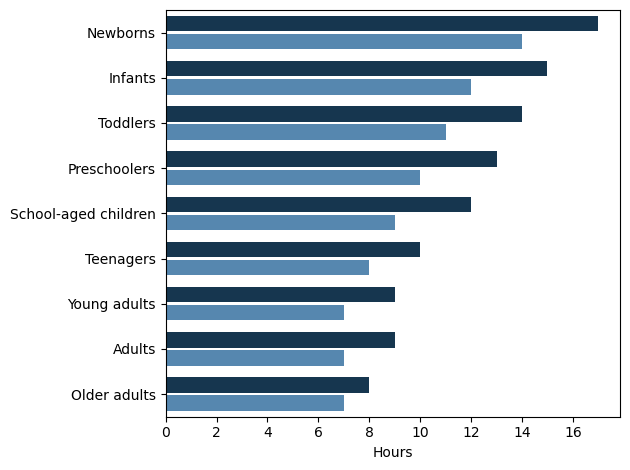

In [4]:
fig, ax = plt.subplots()

width = 0.5
gap = 0.15
color = ['#0c3759', '#4789be']

ax = sns.barplot(x='value',
                 y='Age group',
                 hue='variable',
                 data=df_slp_melted, 
                 gap=gap,
                 ax=ax,
                 palette=color)
#                  width=width,)
                  
ax.legend_.remove()
ax.set_xlabel('Hours')
ax.set_ylabel('')
fig.tight_layout()
fig.savefig('A4-Q1.png')

# Question 2

In [5]:
df_temp = pd.read_csv('temps.csv')
df_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.16,-0.08,-0.12,-0.21,-0.20,-0.16
1,1881,-0.18,-0.13,0.04,0.06,0.08,-0.18,0.01,-0.03,-0.14,-0.21,-0.17,-0.06
2,1882,0.17,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,-0.12,-0.22,-0.15,-0.35
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.13,-0.20,-0.10,-0.22,-0.10
4,1884,-0.12,-0.06,-0.35,-0.39,-0.33,-0.35,-0.29,-0.27,-0.26,-0.24,-0.32,-0.30


In [6]:
df_temp['Average'] = df_temp.iloc[:, 1:].mean(axis=1).round(3)
pd.DataFrame(df_temp)
df_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.16,-0.08,-0.12,-0.21,-0.20,-0.16,-0.154
1,1881,-0.18,-0.13,0.04,0.06,0.08,-0.18,0.01,-0.03,-0.14,-0.21,-0.17,-0.06,-0.076
2,1882,0.17,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,-0.12,-0.22,-0.15,-0.35,-0.097
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.13,-0.20,-0.10,-0.22,-0.10,-0.162
4,1884,-0.12,-0.06,-0.35,-0.39,-0.33,-0.35,-0.29,-0.27,-0.26,-0.24,-0.32,-0.30,-0.273


In [7]:
df = pd.read_csv('temps.csv')


df['Year'] = pd.to_datetime(df['Year'], format='%Y')

def group_by_decade(df):
    decades = []
    start_year = df['Year'].dt.year.min()
    end_year = df['Year'].dt.year.max()
    for start in range(start_year, end_year + 1, 10):
        end = start + 9
        decade_df = df[(df['Year'].dt.year >= start) & (df['Year'].dt.year <= end)]
        decades.append(decade_df)
    return decades


decades_data = group_by_decade(df)
decades_df = pd.concat(decades_data, ignore_index=True)


decade_avg_temps = decades_df.groupby(decades_df['Year'].dt.year // 10 * 10)['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'].mean()

decade_avg_temps_df = pd.DataFrame(decade_avg_temps)

decade_avg_temps_df

C:\Users\Siam Islam\AppData\Local\Temp\ipykernel_12140\1699631041.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decade_avg_temps = decades_df.groupby(decades_df['Year'].dt.year // 10 * 10)['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'].mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-0.270,-0.220,-0.181,-0.192,-0.181,-0.230,-0.156,-0.188,-0.193,-0.206,-0.212,-0.196
1890,-0.328,-0.321,-0.297,-0.262,-0.237,-0.222,-0.169,-0.195,-0.166,-0.150,-0.219,-0.210
1900,-0.376,-0.300,-0.263,-0.302,-0.332,-0.318,-0.296,-0.302,-0.310,-0.280,-0.285,-0.331
1910,-0.317,-0.299,-0.356,-0.311,-0.332,-0.365,-0.306,-0.316,-0.302,-0.280,-0.292,-0.370
1920,-0.199,-0.269,-0.200,-0.281,-0.284,-0.315,-0.260,-0.266,-0.229,-0.171,-0.103,-0.254
1930,-0.130,-0.116,-0.156,-0.178,-0.160,-0.181,-0.126,-0.120,-0.100,-0.030,-0.041,-0.074
1940,0.116,0.053,0.037,0.086,0.054,-0.012,0.025,0.011,0.022,0.107,0.064,0.003
1950,-0.028,-0.066,-0.070,-0.058,-0.052,-0.038,-0.033,-0.032,-0.033,-0.036,-0.080,-0.037
1960,-0.071,-0.019,-0.035,-0.062,-0.041,-0.010,-0.019,-0.014,-0.031,-0.004,-0.013,-0.039


In [8]:
decade_avg_temps_df['Average'] = decade_avg_temps_df.iloc[:, 1:].mean(axis=1).round(3)
decade_avg_temps_df = decade_avg_temps_df.reset_index()
decade_avg_temps_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1880,-0.270,-0.220,-0.181,-0.192,-0.181,-0.230,-0.156,-0.188,-0.193,-0.206,-0.212,-0.196,-0.196
1,1890,-0.328,-0.321,-0.297,-0.262,-0.237,-0.222,-0.169,-0.195,-0.166,-0.150,-0.219,-0.210,-0.223
2,1900,-0.376,-0.300,-0.263,-0.302,-0.332,-0.318,-0.296,-0.302,-0.310,-0.280,-0.285,-0.331,-0.302
3,1910,-0.317,-0.299,-0.356,-0.311,-0.332,-0.365,-0.306,-0.316,-0.302,-0.280,-0.292,-0.370,-0.321
4,1920,-0.199,-0.269,-0.200,-0.281,-0.284,-0.315,-0.260,-0.266,-0.229,-0.171,-0.103,-0.254,-0.239
5,1930,-0.130,-0.116,-0.156,-0.178,-0.160,-0.181,-0.126,-0.120,-0.100,-0.030,-0.041,-0.074,-0.117
6,1940,0.116,0.053,0.037,0.086,0.054,-0.012,0.025,0.011,0.022,0.107,0.064,0.003,0.041
7,1950,-0.028,-0.066,-0.070,-0.058,-0.052,-0.038,-0.033,-0.032,-0.033,-0.036,-0.080,-0.037,-0.049
8,1960,-0.071,-0.019,-0.035,-0.062,-0.041,-0.010,-0.019,-0.014,-0.031,-0.004,-0.013,-0.039,-0.026
9,1970,0.042,0.018,0.066,0.068,0.048,0.024,0.020,0.012,0.033,0.008,0.028,0.036,0.033


In [9]:
x = decade_avg_temps_df[(decade_avg_temps_df['Year']>1950) & (decade_avg_temps_df['Year']<1981)]
x_dashed = x['Average'].mean().round(3)
x_dashed

0.082

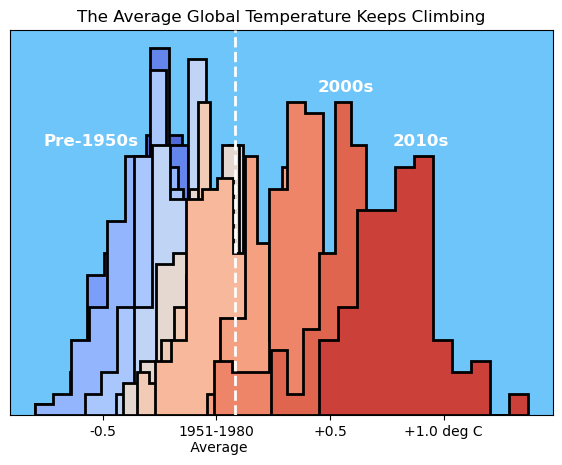

In [10]:
plt.figure(figsize=(7, 5))
plt.title('The Average Global Temperature Keeps Climbing')

decades_data_reversed = decades_data[::-1]

outer_palette = ['k'] * len(decades_data_reversed)  
inner_palette = sns.color_palette("coolwarm", n_colors=len(decades_data_reversed))[::-1]

for i, decade_df in enumerate(decades_data_reversed):
    deviation_values = decade_df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values.flatten()
    plt.hist(deviation_values, bins=11, 
             color=inner_palette[i], 
             histtype='stepfilled', 
             edgecolor=outer_palette[i], 
             linewidth=2, 
             zorder=len(decades_data_reversed)-i)
    
plt.axvline(x=x_dashed, color='white', linestyle='--', linewidth=2, zorder=100)  # Average temperature line
plt.ylabel('')
plt.yticks([])
plt.xticks([-0.5, 0, 0.5, 1], ['-0.5', '1951-1980\n Average', '+0.5', '+1.0 deg C'])

plt.text(0.9, 25, '2010s', color='white', fontsize=12, ha='center', weight='bold', zorder=1000)
plt.text(0.57, 30, '2000s', color='white', fontsize=12, ha='center', weight='bold', zorder=1000)
plt.text(-0.55, 25, 'Pre-1950s', color='white', fontsize=12, ha='center', weight='bold', zorder=1000)
plt.gca().set_facecolor('#6ec5fa')
plt.savefig('A4-Q2.png')
plt.show()


# Question 3

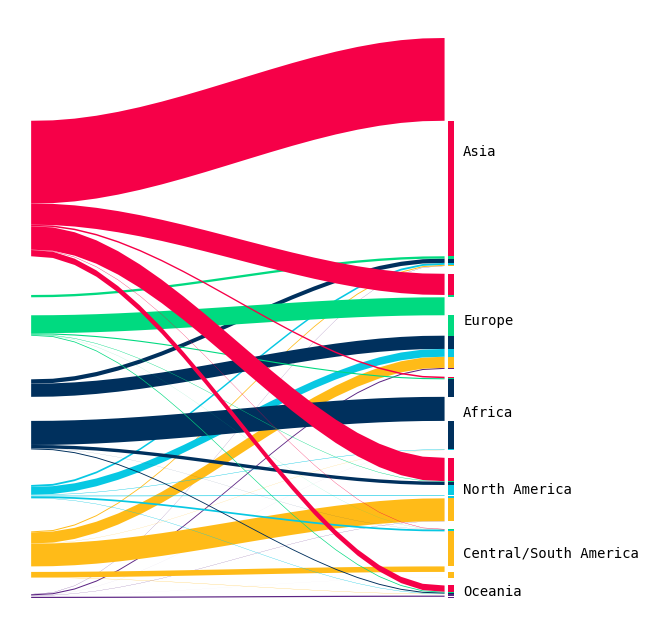

In [11]:
import numpy as np
from collections import Counter, defaultdict, OrderedDict
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import colormaps


def plot(input_data, *args, **kwargs):
    # This function plots the alluvial diagram
    # It allows the user to use this module without seeing its internals!!!!!!!!!!!!!!!!! It's magic!!!
    # TODO: Turn this function into a static method in AlluvialTool
    at = AlluvialTool(input_data, *args, **kwargs)
    ax = at.plot(**kwargs)
    ax.axis('off')
    return ax


class AlluvialTool:
    def __init__(
            self,
            input_data=(),
            x_range=(0, 1),
            res=20,
            h_gap_frac=0.03,
            v_gap_frac=0.03,
            **kwargs):
        # TODO: Break __init__ into several smaller sub-methods that do one thing each!
        # TODO: Turn all "getters" into setters or generate methods
        # TODO: Add documentation to methods
        self.input = input_data  # Describes pairs of labels from 2 categories (e.g. "country" - "spoken language")
        self.x_range = x_range  # Diagram coordinates in x-axis
        self.res = res  # Defines the number of spline points used to draw veins
        self.h_gap_frac = h_gap_frac  # Defines the horizontal distance between matplotlib patches (relative to x_range)
        self.v_gap_frac = v_gap_frac  # Defines the vertical distance between matplotlib patches (relative to max y)
        self.vein_blueprint = self.make_vein_blueprint_arrays()
        self.input_data_dict = self.read_input()  # TODO: Consider explicitly passing input_data
        self.item_width_dict = self.get_item_width_dict()
        self.src_group, self.dst_group = self.groups = self.get_ordered_label_groups(**kwargs)
        # TODO: get h_gap and v_gap from method/s
        self.h_gap = x_range[1] * h_gap_frac
        self.v_gap = sum(
            [width for b_item_counter in self.input_data_dict.values()
             for width in b_item_counter.values()]
        ) * v_gap_frac
        self.group_widths = self.get_group_widths()
        self.item_coord_dict = self.generate_item_coordinate_dict()
        self.alluvial_fan = self.generate_alluvial_fan()
        self.item_text_len, self.width_text_len = self.get_vein_label_lengths()

    def make_vein_blueprint_arrays(self):
        y = np.array([0, 0.15, 0.5, 0.85, 1])
        x = np.linspace(self.x_range[0], self.x_range[-1], len(y))
        z = np.polyfit(x, y, 4)
        f = np.poly1d(z)

        blueprint_x_vals = np.linspace(x[0], x[-1], self.res)
        blueprint_y_vals = f(blueprint_x_vals)
        return blueprint_x_vals, blueprint_y_vals

    def get_vein_polygon_xy(self, y_range, width):
        x, y = self.vein_blueprint
        y0, yn = y_range
        scale = yn - y0
        ty = y * scale + y0
        x_new = np.concatenate([x, x[::-1], ])
        y_new = np.concatenate([ty, ty[::-1] + width, ])
        return np.array([x_new, y_new]).transpose()

    def read_input_from_list(self):
        data_table = np.array(self.input)
        data_dic = defaultdict(Counter)
        for line in data_table:
            data_dic[line[0]][line[1]] += 1
        return data_dic

    def read_input_from_dict(self):
        # data_dic = self.input
        # data_table = []
        # for x_item, y_item_counter in data_dic.items():
        #     for y_item, count in y_item_counter.items():
        #         data_table += [[x_item, y_item]] * count
        # data_table = np.array(sorted(data_table))
        # return data_table, data_dic
        return self.input

    def read_input(self):
        if type(self.input) == dict:
            return self.read_input_from_dict()
        else:
            return self.read_input_from_list()

    def get_item_width_dict(self):
        iwd = Counter()  # item_width_dict
        for src_item_label, dst_width_dict in self.input_data_dict.items():
            for dst_item_label, width in dst_width_dict.items():
                iwd[src_item_label] += width
                iwd[dst_item_label] += width
        return iwd

    def get_ordered_label_groups(self, src_label_override=None, dst_label_override=None, **kwargs):
        # TODO: Remove code duplication from creation of src, dst lists
        _ = kwargs

        src_ordered_labels = src_label_override if src_label_override else sorted(
            {src_item for src_item in self.input_data_dict}, key=lambda x: self.item_width_dict[x])

        dst_ordered_labels = dst_label_override if dst_label_override else sorted(
            {dst_item for dst_item_counter in self.input_data_dict.values() for dst_item in dst_item_counter},
            key=lambda x: self.item_width_dict[x])

        return src_ordered_labels, dst_ordered_labels

    def get_group_widths(self):
        return [self.get_group_width(group) for group in (self.src_group, self.dst_group)]

    def get_group_width(self, group):
        return sum([self.item_width_dict[item] for item in group]) + (len(group) - 1) * self.v_gap

    def generate_item_coordinate_dict(self, ):
        item_coord_dict = defaultdict(ItemCoordRecord)
        for ind, group in enumerate(self.groups):
            last_pos = (max(self.group_widths) - self.group_widths[ind]) / 2
            # TODO: Move inner for loop into a method
            for item in group:
                width = self.item_width_dict[item]
                xy = (self.x_range[ind], last_pos)
                item_coord_dict[item].set_start_state(width, xy, side=ind)
                last_pos += width + self.v_gap
        return item_coord_dict

    def generate_alluvial_vein(self, src_item, dst_item):
        width = self.input_data_dict[src_item][dst_item]
        src_item_coord = self.item_coord_dict[src_item].read_state_and_advance_y(width)
        dst_item_coord = self.item_coord_dict[dst_item].read_state_and_advance_y(width)
        y_range = (src_item_coord[1], dst_item_coord[1],)
        vein_polygon = self.get_vein_polygon_xy(y_range, width)

        # Adjust x-coordinate for source fans on the left side
        if src_item_coord[0] == self.x_range[0]:
            vein_polygon[:, 0] += 2 * self.h_gap  # Adjusting the x-coordinate for left side source fans

        return vein_polygon


    def get_label_rectangles_xy(self, a_item, b_item):
        width = self.input_data_dict[a_item][b_item]
        return (
            self.generate_item_sub_rectangle(a_item, width),
            self.generate_item_sub_rectangle(b_item, width),
        )

    def generate_item_sub_rectangle(self, item, width):
        dic_entry = self.item_coord_dict[item]
        item_coord = dic_entry.read_state()
        sign = dic_entry.get_side_sign()
        return self.get_rectangle_xy(item_coord, width, sign)

    def get_rectangle_xy(self, item_coord, width, sign):
        x, y = item_coord
        rect = [[
            x + sign * 0.5 * (0.5 + xa) * self.h_gap,
            y + ya * width,
        ] for xa, ya in ((0, 1), (0, 0), (1, 0), (1, 1))]
        return np.array(rect)

    def generate_alluvial_fan(self, ):
        alluvial_fan = OrderedDict()
        for src_item in self.src_group:
            dst_items_for_current_src_item = self.input_data_dict[src_item].keys()
            for dst_item in self.dst_group:
                if dst_item in dst_items_for_current_src_item:
                    src_label_rect, dst_label_rect = self.get_label_rectangles_xy(src_item, dst_item)
                    alluvial_fan[(src_item, dst_item)] = [
                        self.generate_alluvial_vein(src_item, dst_item),
                        src_label_rect,
                        dst_label_rect,
                    ]
        return alluvial_fan

    def plot(self, figsize=(10, 15), alpha=0.5, **kwargs):
        colors = self.get_color_array(**kwargs)
        fig, ax = plt.subplots(figsize=figsize)
        for ind, vein_items in enumerate(self.alluvial_fan.values()):
            patches = [Polygon(item, facecolor=colors[ind], alpha=alpha) for item in vein_items]
            for patch in patches:
                ax.add_patch(patch)
        self.auto_label_veins(**kwargs)
        self.label_sides(**kwargs)
        ax.autoscale()
        return ax

    def get_color_array(self, colors=None, color_side=0, rand_seed=1, cmap=None, **kwargs):
        _ = kwargs
        color_items = self.dst_group if color_side else self.src_group
        lci = len(color_items)
        if rand_seed is not None:
            np.random.seed(rand_seed)
        # Use specified colors for each item
        color_mapping = {
            'North America': '#07c8e3',
            'Europe': '#00da80',
            'Central/South America': '#ffbb18',
            'Asia': '#f60048',
            'Africa': '#00305d',
            'Oceania': '#5c2483',
        }
        color_array = [color_mapping[item] for item in color_items]
        polygon_colors = []
        for a_item, b_item, in self.alluvial_fan:
            item = b_item if color_side else a_item
            polygon_colors += [color_array[color_items.index(item)]]
        return np.array(polygon_colors)

    def get_vein_label_lengths(self):
        item_text_len = max([len(it) for it in self.item_width_dict], default=0)
        width_text_len = max([len(str(w)) for w in self.item_width_dict.values()], default=0)
        return item_text_len, width_text_len

    def auto_label_veins(self, fontname='Monospace', **kwargs):
        # shift = max([len(item) for item in self.item_coord_dic.keys()]) / 50
        for item, vein in self.item_coord_dict.items():
            y_width = vein.get_width()
            sign = vein.get_side_sign()
            side = int(sign + 1) // 2
            ha = 'left' if side else 'right'
            plt.text(
                vein.get_x() + 1.5 * sign * self.h_gap,
                vein.get_y() + y_width / 2,
                self.item_text(item, side, **kwargs),
                ha=ha, va='center', fontname=fontname)

    def label_sides(
            self,
            labels=None,
            label_shift=0,
            disp_width=False,
            wdisp_sep=7 * ' ',
            fontname='Arial',
            **kwargs):
        if labels is not None:
            _ = kwargs
            y = max(self.group_widths) / 2
            itl, wtl = self.item_text_len, self.width_text_len
            for side, sign in enumerate((-1, 1)):
                x_coord = self.x_range[side] + sign * (
                        label_shift + itl + int(disp_width) * (len(wdisp_sep) + wtl)) * self.h_gap_frac
                if side == 0:  # Adjust x-coordinate for left side labels
                    x_coord -= itl * self.h_gap_frac
                plt.text(
                    x_coord,
                    y,
                    labels[side],
                    ha='center',
                    va='center',
                    fontname=fontname,
                    fontsize=16,
                    rotation=90 - 180 * side
                )

    def item_text(
            self, item, side,
            disp_width=False, wdisp_sep=7 * ' ', width_in=True, **kwargs):
        _ = kwargs
        f_item = item
        # f_item = bidi.algorithm.get_display(item)  # for RTL languages
        tal = '<' if f_item == item else '>'
        if not disp_width:
            ans = ('{:%s}' % tal).format(item)
        else:
            width = self.item_coord_dict[item].get_width()
            if side and width_in or (not side and not width_in):
                lc, rc, wl, wr, tl, tr = '>', tal, self.width_text_len, self.item_text_len, width, f_item,
            else:
                lc, rc, wl, wr, tl, tr = tal, '>', self.item_text_len, self.width_text_len, f_item, width,
            pat = '{:%s%d}%s{:%s%d}' % (lc, wl, wdisp_sep, rc, wr,)
            ans = pat.format(tl, tr, )
        return ans


class ItemCoordRecord:
    def __init__(self, ):
        self.width = 0
        self.xy = ()
        self.curr_xy = self.xy[:]
        self.side = -1

    def set_start_state(self, width, xy, side):
        self.width = width
        self.xy = xy
        self.curr_xy = list(self.xy[:])
        self.side = side

    def read_state_and_advance_y(self, width):
        out = self.curr_xy[:]
        self.curr_xy[1] += width
        return out

    def read_state_and_advance_x(self, width):
        out = self.curr_xy[:]
        self.curr_xy[0] += width
        return out

    def read_state(self):
        return self.curr_xy[:]

    def get_xy(self, ):
        return self.xy

    def get_x(self, ):
        return self.xy[0]

    def get_y(self, ):
        return self.xy[1]

    def get_width(self, ):
        return self.width

    def get_side_sign(self, ):
        return 1 if self.side else -1


df_mgn = pd.read_csv('migration.csv', index_col='origin')
df_mgn_dict = df_mgn.to_dict(orient='index')

# Create an instance of AlluvialTool with custom source and destination labels
alluvial_tool = AlluvialTool(input_data=df_mgn_dict)
    
# Plot the alluvial diagram
ax = alluvial_tool.plot(figsize=(6, 8), alpha=1)
ax.set_axis_off()
plt.show()


In [12]:
def label_sides(
        self,
        labels=None,
        label_shift=0,
        disp_width=False,
        wdisp_sep=7 * ' ',
        fontname='Arial',
        **kwargs):
    if labels is not None:
        _ = kwargs
        y = max(self.group_widths) / 2
        itl, wtl = self.item_text_len, self.width_text_len
        for side, sign in enumerate((-1, 1)):
            plt.text(
                self.x_range[side] + sign * (
                        label_shift + itl + int(disp_width) * (len(wdisp_sep) + wtl))
                * self.h_gap_frac,
                y,
                labels[side],
                ha='center',
                va='center',
                fontname=fontname,
                fontsize=16,
                rotation=90 - 180 * side
            )
